In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import math
import os
from tqdm import trange

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.data_utils import GeneratorEnqueuer

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
#from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

['mobilenetnetrepo', 'google-ai-open-images-object-detection-track', 'keras-models', 'mobilenet']


Using TensorFlow backend.


In [2]:
#image_path = "../input/test/challenge2018_test/"
image_path = "../input/google-ai-open-images-object-detection-track/test/"
batch_size = 100
img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

Found 99999 images belonging to 1 classes.


In [3]:
#from imageai.Detection import ObjectDetection

#model_weight_path = "../input/mobilenet/mobilenet_7_5_224_tf.h5"

mobile_net_model= MobileNet(weights='../input/mobilenetnetrepo/mobilenet_1_0_224_tf.h5',include_top=True)
mobile_net_model.trainable = False

In [4]:
def prepare_image(file):
    img_path = "../input/google-ai-open-images-object-detection-track/test/challenge2018_test/"

    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
#from subprocess import check_output
#print(check_output(["ls", "../input/google-ai-open-images-object-detection-track/test"]).decode("utf8"))

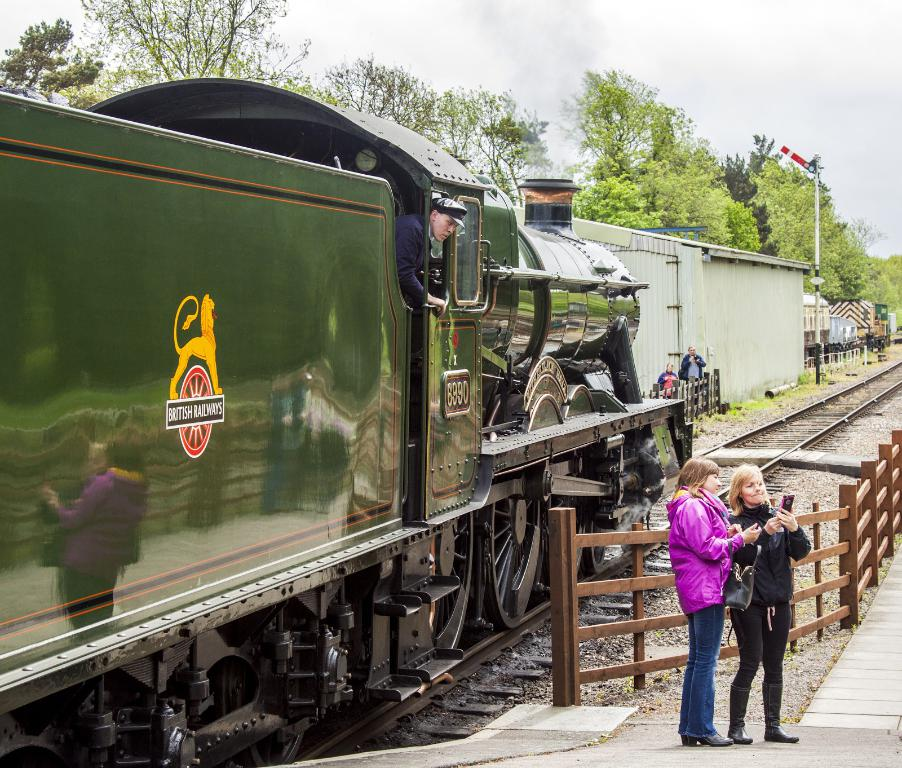

In [6]:
from IPython.display import Image
Image(filename='../input/google-ai-open-images-object-detection-track/test/challenge2018_test/0045a282f01ef203.jpg')

In [7]:
#!cp ../input/mobilenetnetrepo/mobilenet_1_0_224_tf.h5 ~/.keras/mobilenet_1_0_224_tf.h5 

In [8]:
from learntools.deep_learning.decode_predictions import decode_predictions


In [9]:
#import sys
# Add directory holding utility functions to path to allow importing utility functions
#sys.path.append('/kaggle/input/python-utility-code-for-deep-learning-exercises/utils')
#from decode_predictions import decode_predictions


In [10]:
#print(sys.path)

In [11]:
#os.PathLike

In [12]:
preprocessed_image = prepare_image('0045a282f01ef203.jpg')
predictions = mobile_net_model.predict(preprocessed_image)
#results = decode_predictions(predictions,top=5, class_list_path=sys.path)
results = decode_predictions(predictions, top=5, class_list_path='../input/keras-models/imagenet_class_index.json')
results


[[('n04310018', 'steam_locomotive', 0.9926623),
  ('n04467665', 'trailer_truck', 0.0018436647),
  ('n03895866', 'passenger_car', 0.0018127183),
  ('n03393912', 'freight_car', 0.0017295282),
  ('n03272562', 'electric_locomotive', 0.0010799478)]]